In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_csv("AmesHousing.csv")

# Printing first 5 records of the dataset
print(df.head(5))

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [3]:
# to check for which column has null values
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [4]:
# Drop a column  if it has a large percentage of missing data (threshhold 0.7)
threshhold = 0.70
missing = df.isnull().mean()
print(missing)

df.drop(columns = missing[missing > threshhold].index, inplace=True)
print(df.head(5))

Order             0.000000
PID               0.000000
MS SubClass       0.000000
MS Zoning         0.000000
Lot Frontage      0.167235
                    ...   
Mo Sold           0.000000
Yr Sold           0.000000
Sale Type         0.000000
Sale Condition    0.000000
SalePrice         0.000000
Length: 82, dtype: float64
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0       IR1          Lvl    AllPub  ...              0          0   
1       Reg          Lvl    AllPub  ...              0          0   
2     

In [5]:
# drop rows with missing target values because they won't contribute to any learning
df.dropna(subset = ["SalePrice"], inplace=True)
print(df.head(5))

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0       IR1          Lvl    AllPub  ...              0          0   
1       Reg          Lvl    AllPub  ...              0          0   
2       IR1          Lvl    AllPub  ...              0          0   
3       Reg          Lvl    AllPub  ...              0          0   
4       IR1          Lvl    AllPub  ...              0          0   

  Screen Porch Pool Area Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
0            0         0        0       5 

Visualization for detecting normal distribution of each features

In [46]:
# list of all columns that contains null values
lst_null_values = df.columns[df.isnull().any()].tolist()
print(lst_null_values)

"""
# dictionary of all null values along with their column names
# Get columns with their number of missing values
null_values = df.isnull().sum()

# columns with missing values
columns_with_null = {col: null_values[col] for col in df.columns if null_values[col] > 0}
print(columns_with_null)"""

['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']


'\n# dictionary of all null values along with their column names\n# Get columns with their number of missing values\nnull_values = df.isnull().sum()\n\n# columns with missing values\ncolumns_with_null = {col: null_values[col] for col in df.columns if null_values[col] > 0}\nprint(columns_with_null)'

## Deal with numerical features

In [7]:
# select all numerical columns
num_clos = df.select_dtypes(include=['float64', 'int64']).columns
#print(num_clos)

# list of numerical features that contains null values
num_cols_null = [cols for cols in lst_null_values if cols in num_clos]
print(num_cols_null)

['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']


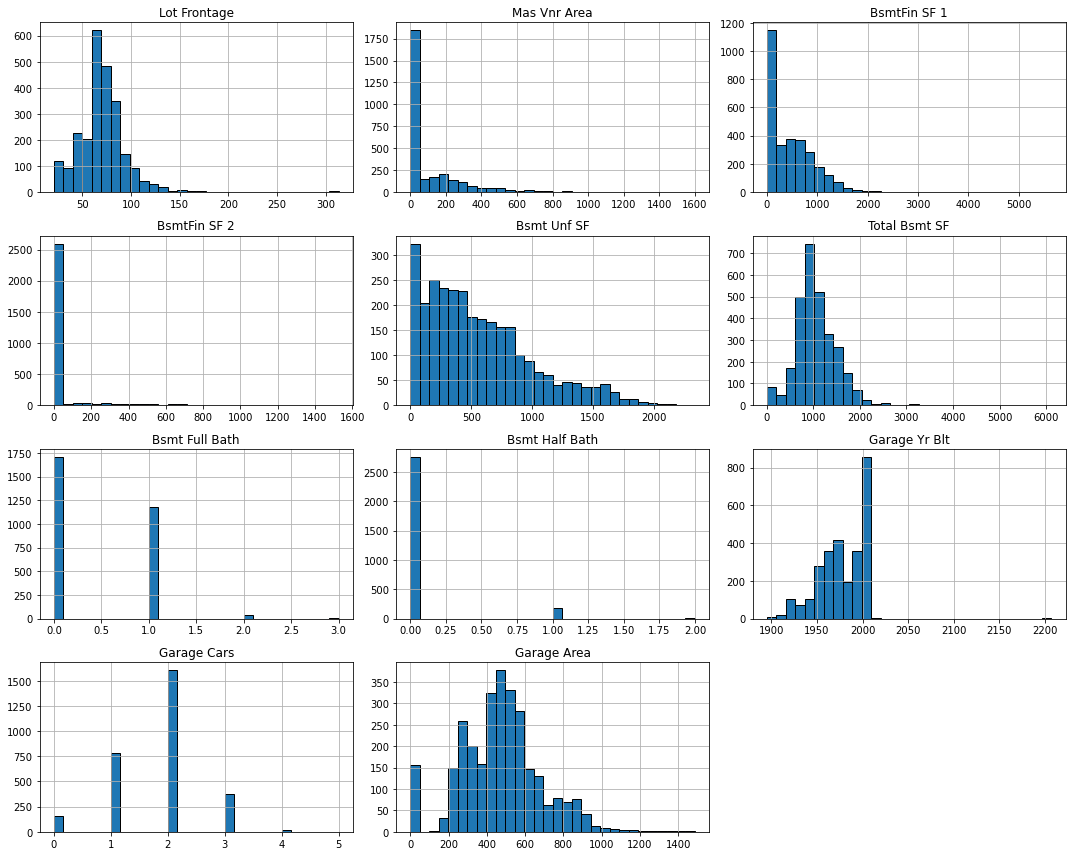

In [8]:
# plot histograms
df[num_cols_null].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

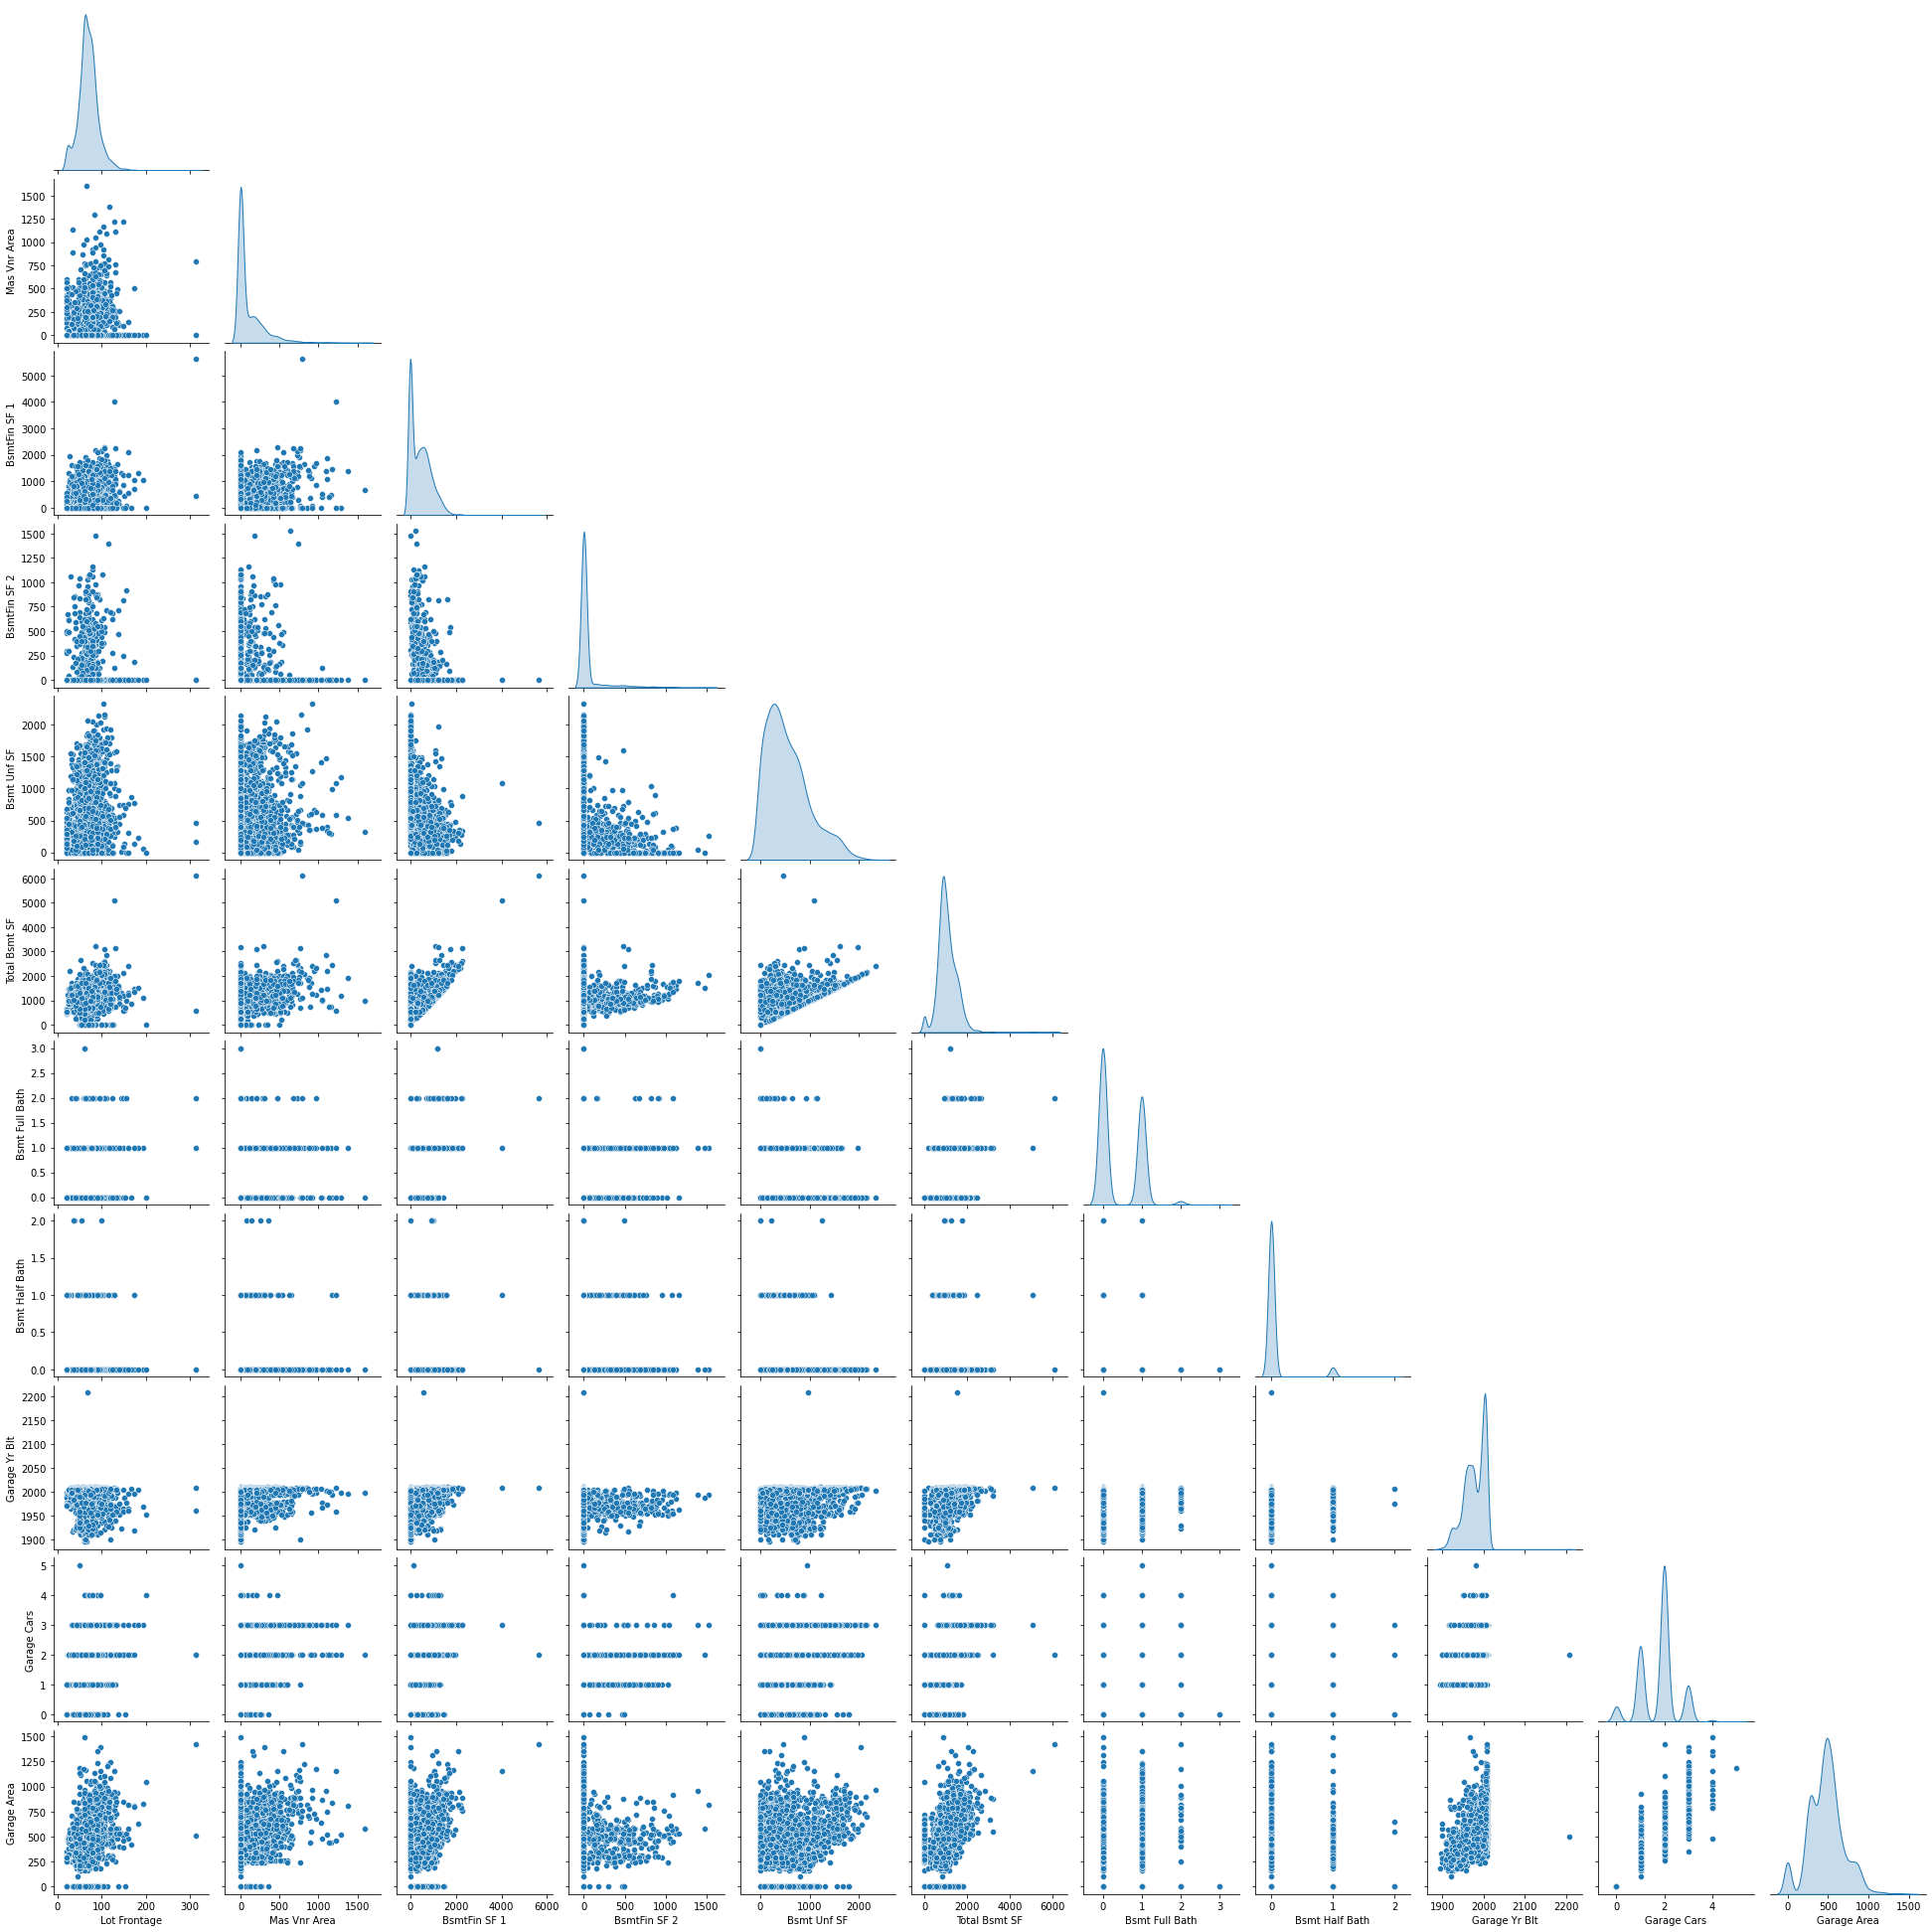

In [9]:
# Pair Plot (Scatterplot Matrix) with KDE Diagonals
sns.pairplot(df[num_cols_null], diag_kind='kde', corner=True)
plt.show()

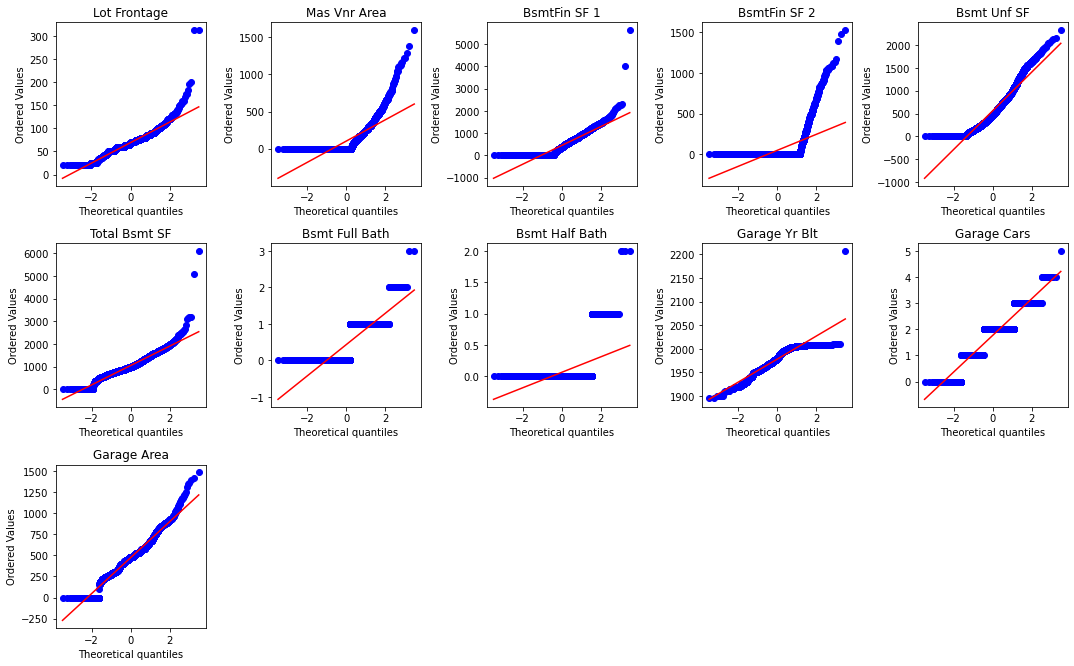

In [10]:
# Generate Q-Q plots for each numerical feature
plt.figure(figsize=(15, 12))
for i, column in enumerate(num_cols_null, 1):
    plt.subplot(4, 5, i)  # Adjust subplot layout as per number of features
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(column)

plt.tight_layout()
plt.show()

By using skewness we can detect where to apply mean and where to apply median

In [15]:
# check for skewed data
# Calculate skewness for each numerical column using skew and kurtosis
skewness = df[num_cols_null].apply(lambda x: skew(x.dropna()))

kurt = df[num_cols_null].apply(lambda x: kurtosis(x.dropna()))

# Combine skewness and kurtosis in a DataFrame
norm_null_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
print(norm_null_df.sort_values(by = ['Skewness', 'Kurtosis'], ascending=[True, True]))

                Skewness   Kurtosis
Garage Yr Blt  -0.384463   1.821119
Garage Cars    -0.219724   0.242504
Garage Area     0.241870   0.947353
Bsmt Full Bath  0.616323  -0.748761
Bsmt Unf SF     0.922580   0.406779
Total Bsmt SF   1.155612   9.117977
BsmtFin SF 1    1.415457   6.845533
Lot Frontage    1.498146  11.209384
Mas Vnr Area    2.605639   9.268606
Bsmt Half Bath  3.938776  14.894223
BsmtFin SF 2    4.137858  18.747388


Handle missing values by inserting means and median according to its skewness or normality

In [16]:
# here we will also do knn imputation in future for missing values based on the similarity of other observations in the datasets.

Fill missing data using mean and median depending on skewness.\
Note: Skewness between -0.5 and 0.5 = data is approximately symmetric\
Skewness between -1 and -0.5 = data is moderately skewed\
Skewness < -1 or Skewness > 1 = data is highly skewed

In [26]:
for row in norm_null_df.index:
    # for highly skewed.
    if norm_null_df.loc[row, "Skewness"] > 0.9 or norm_null_df.loc[row, "Skewness"] < -1:
        df[row] = df[row].fillna(df[row].median())
    else:
        df[row] = df[row].fillna(df[row].mean())

Reducing the impact if outliers by performing transformation for skewed data.\
steps:
1. Calculate skewness (There is no missing values for numerical features right now)
2. Perform transformation:\
Apply a log transformation or box-cox for Highly positive skew\
Apply a cube root or square root for Highly negative skew

## Deal with categorical features

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# 1. Load the dataset
df = pd.read_csv('AmesHousing.csv')

In [5]:
# List of columns with null values
lst_null_values = df.columns[df.isnull().any()].tolist()

# List of columns with null values
lst_null_values = df.columns[df.isnull().any()].tolist()

# Select all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# List of categorical features that contain null values
cat_cols_null = [col for col in lst_null_values if col in cat_cols]
print(cat_cols_null)

['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


Categorical columns with null values: ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


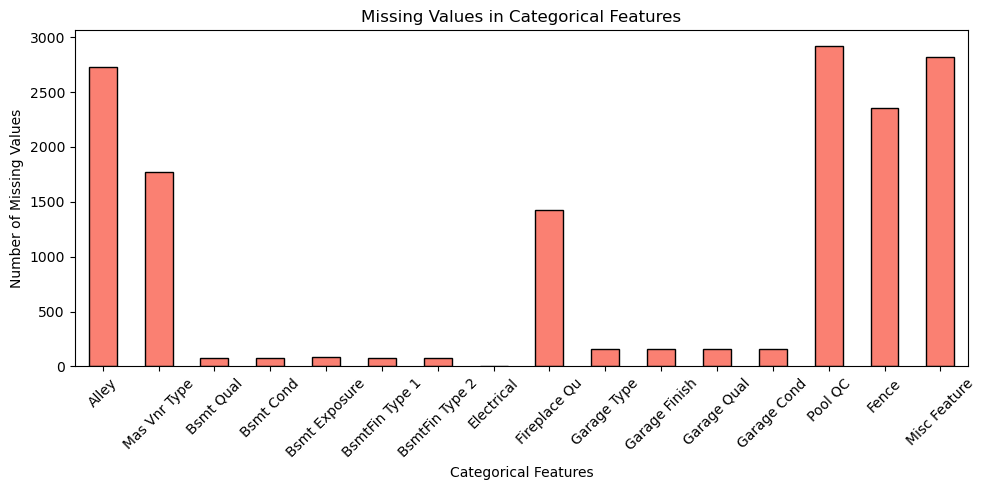

In [6]:
import matplotlib.pyplot as plt

# List of columns with null values
lst_null_values = df.columns[df.isnull().any()].tolist()

# Select all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# List of categorical features that contain null values
cat_cols_null = [col for col in lst_null_values if col in cat_cols]
print("Categorical columns with null values:", cat_cols_null)

# If there are categorical columns with missing values
if cat_cols_null:
    # Count missing values in the categorical columns
    missing_counts = df[cat_cols_null].isnull().sum()

    # Plotting missing values
    plt.figure(figsize=(10, 5))
    missing_counts.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title('Missing Values in Categorical Features')
    plt.xlabel('Categorical Features')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with missing values found.")


In [6]:
import pandas as pd
# 1. Load the dataset
df = pd.read_csv('AmesHousing.csv')
# List of columns with null values
lst_null_values = df.columns[df.isnull().any()].tolist()

# Select all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# List of categorical features that contain null values
cat_cols_null = [col for col in lst_null_values if col in cat_cols]

# Print to verify the categorical columns with missing values
print("Categorical columns with missing values:", cat_cols_null)

Categorical columns with missing values: ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


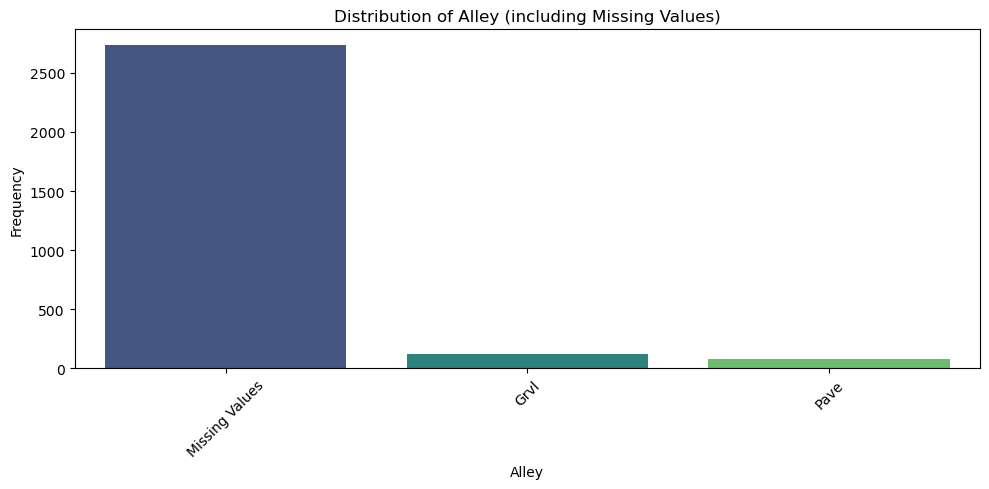

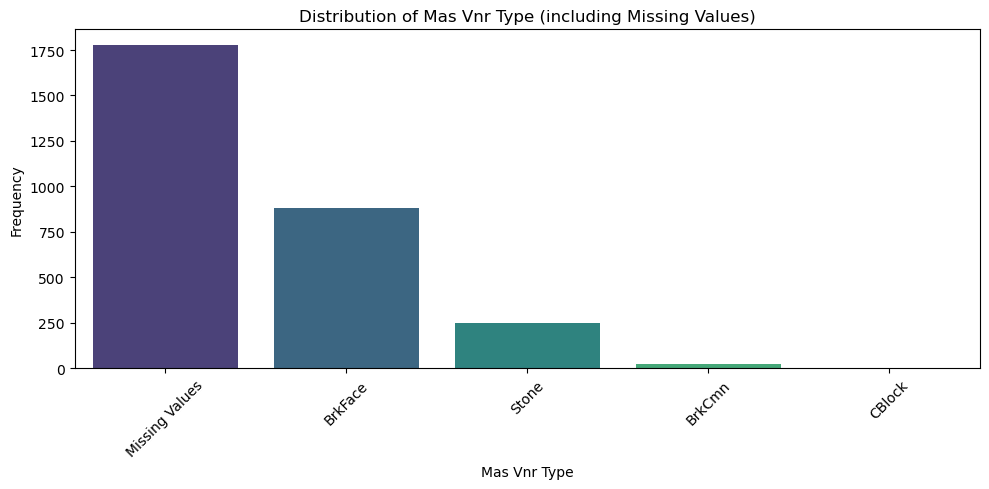

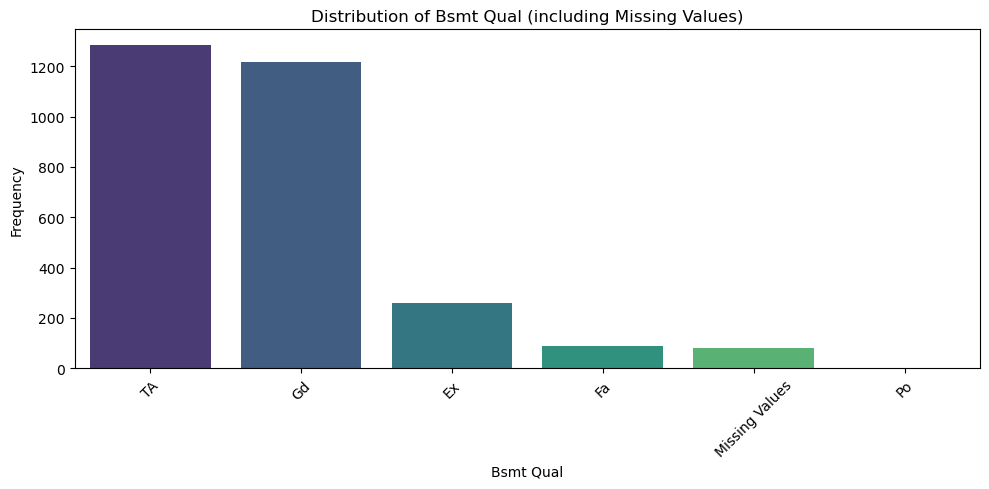

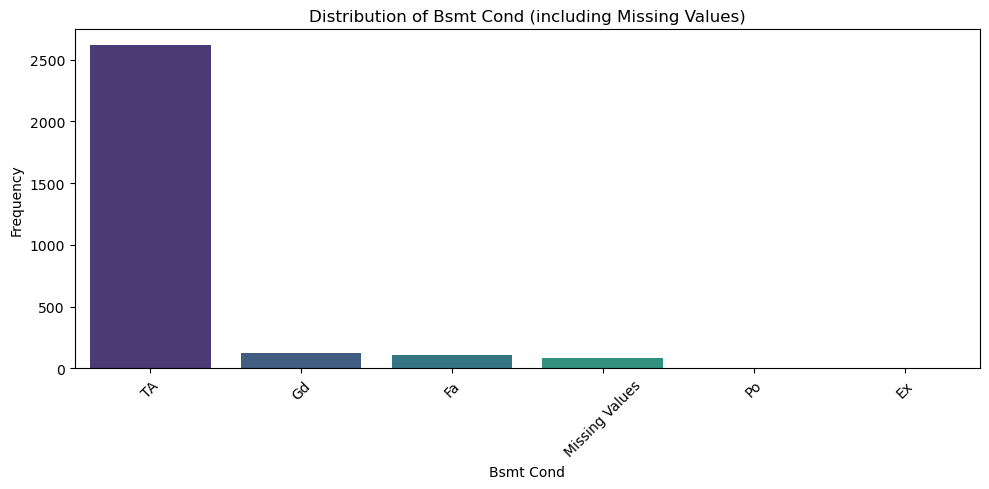

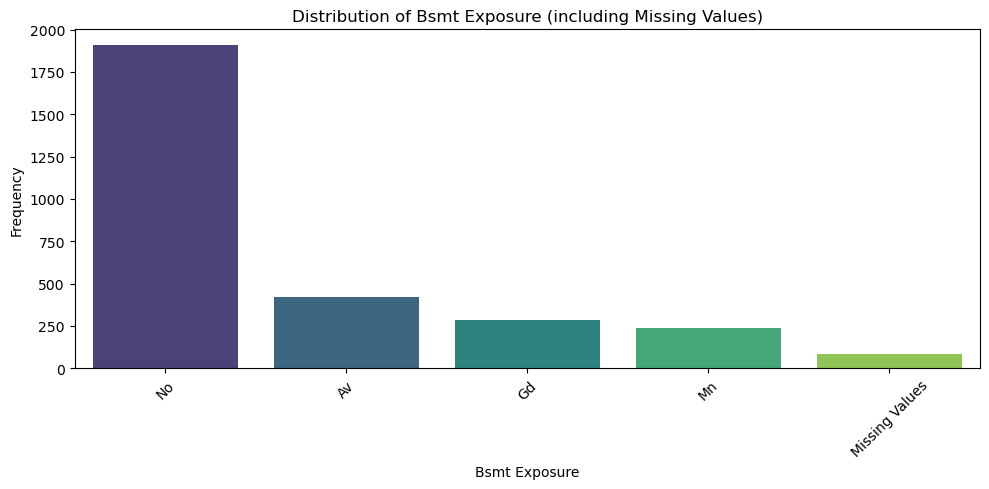

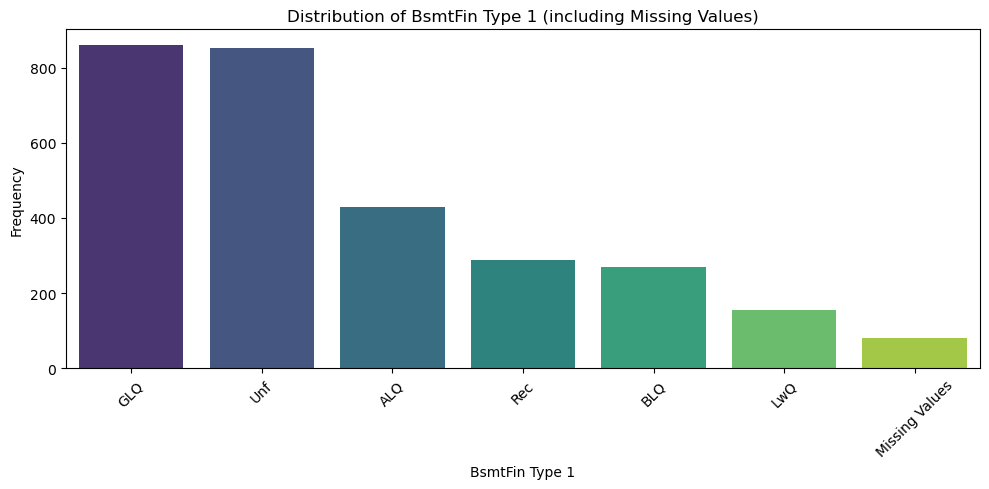

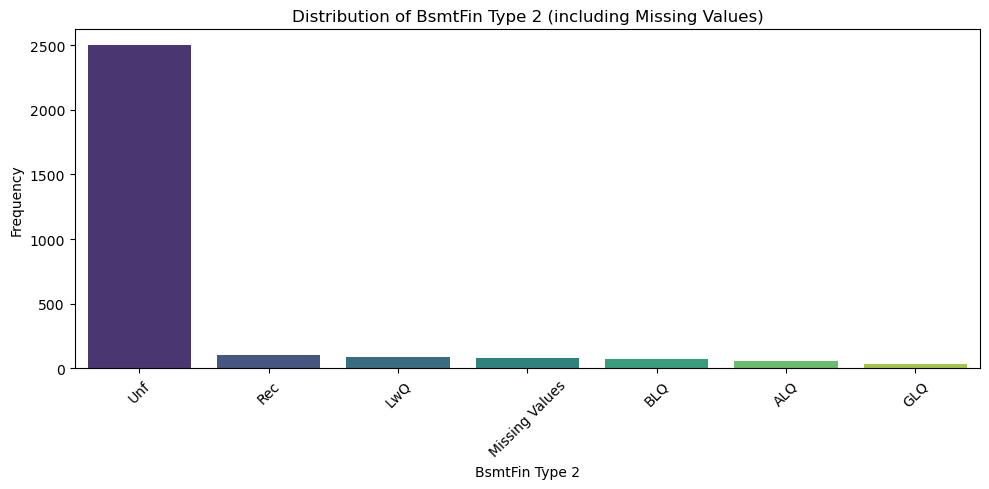

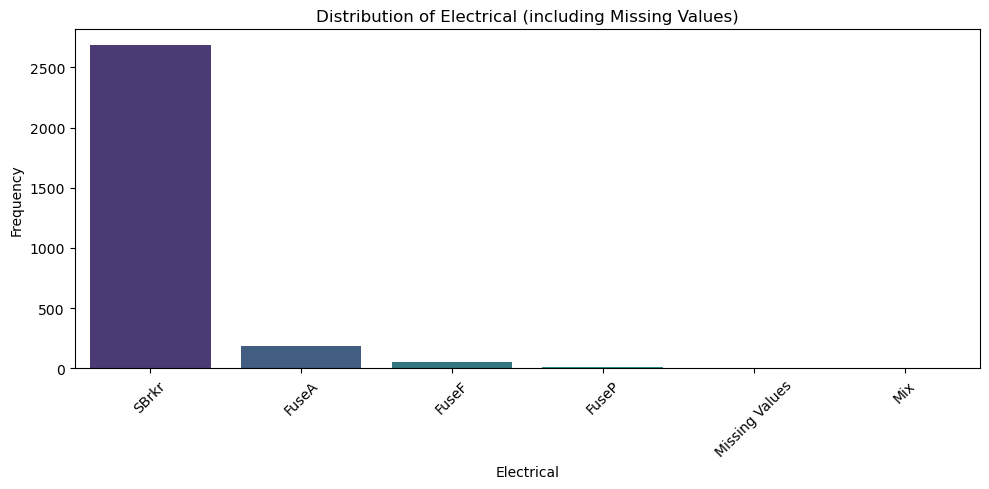

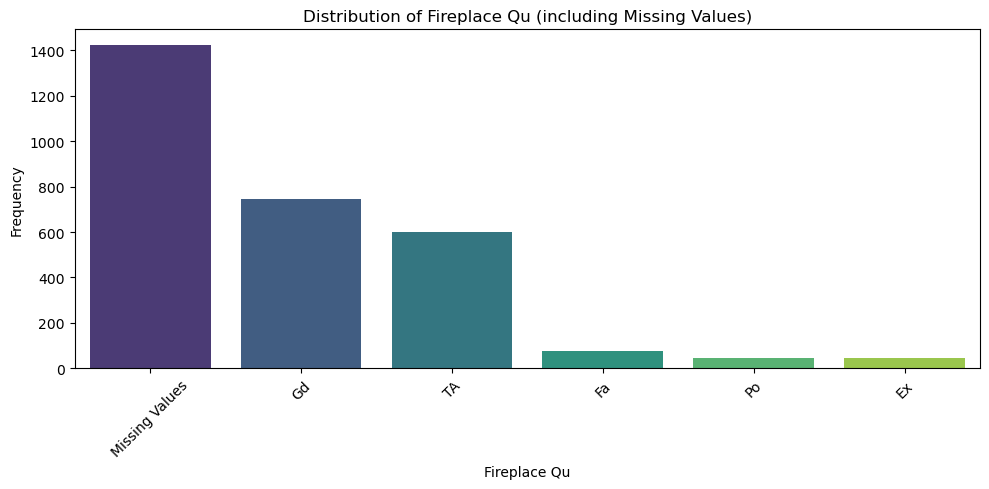

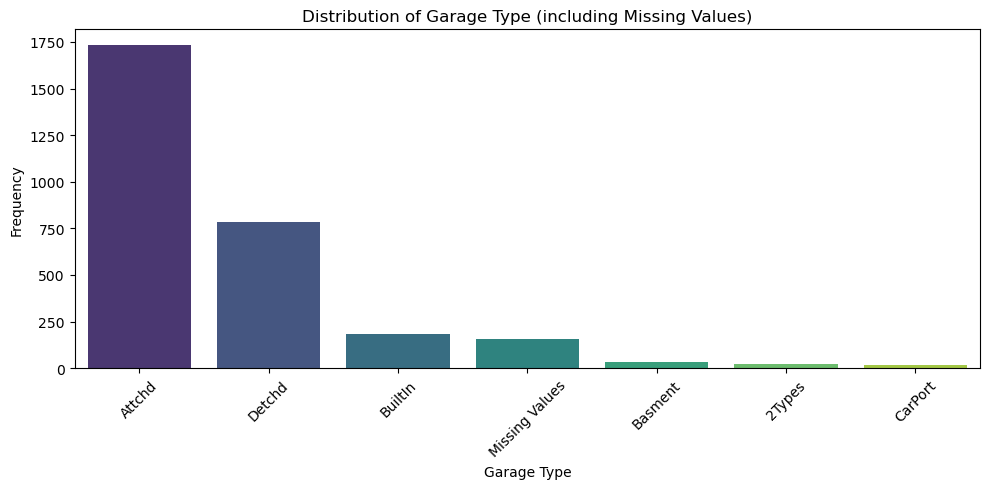

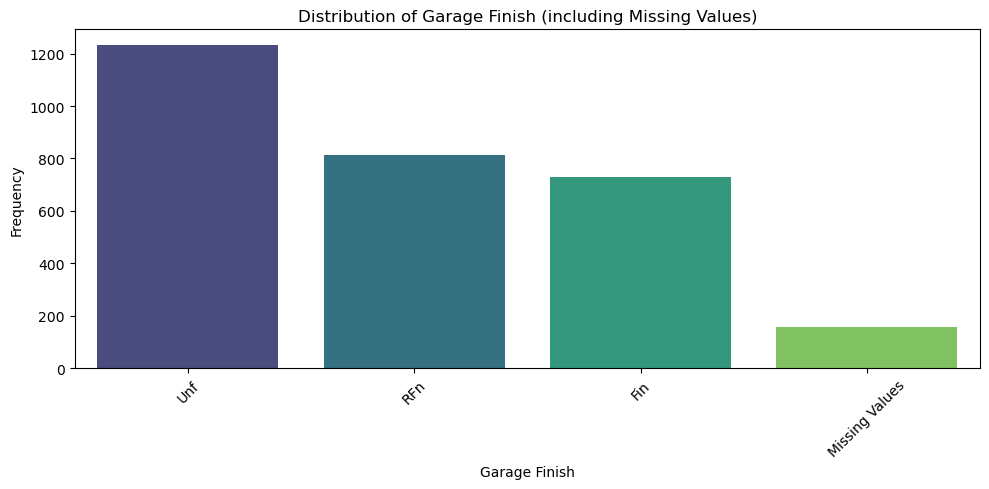

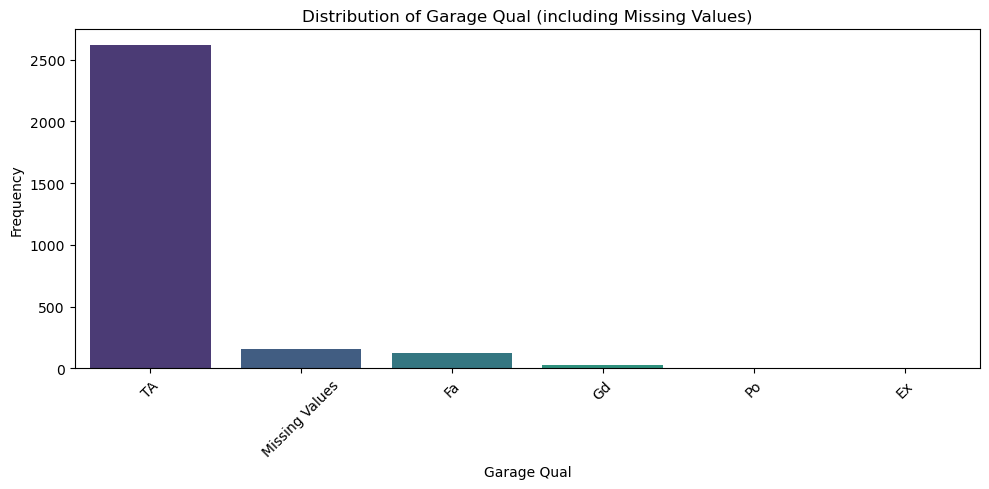

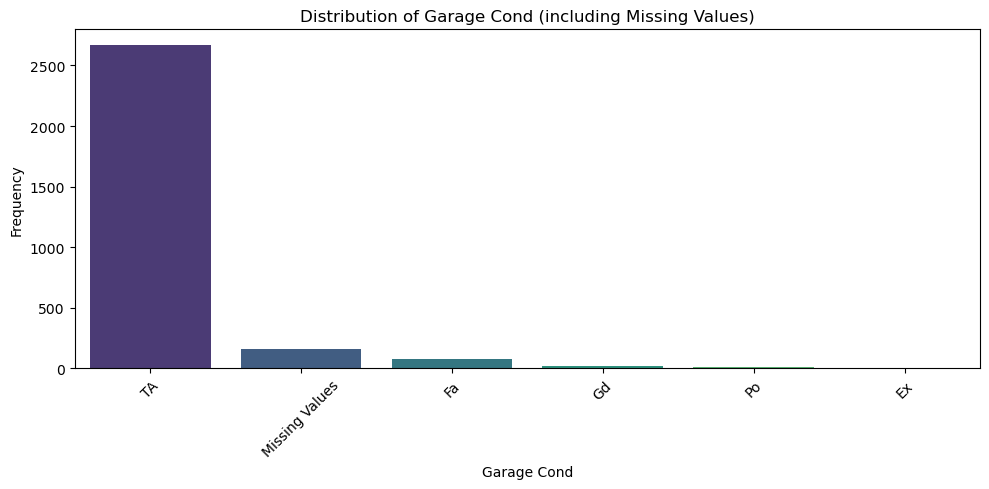

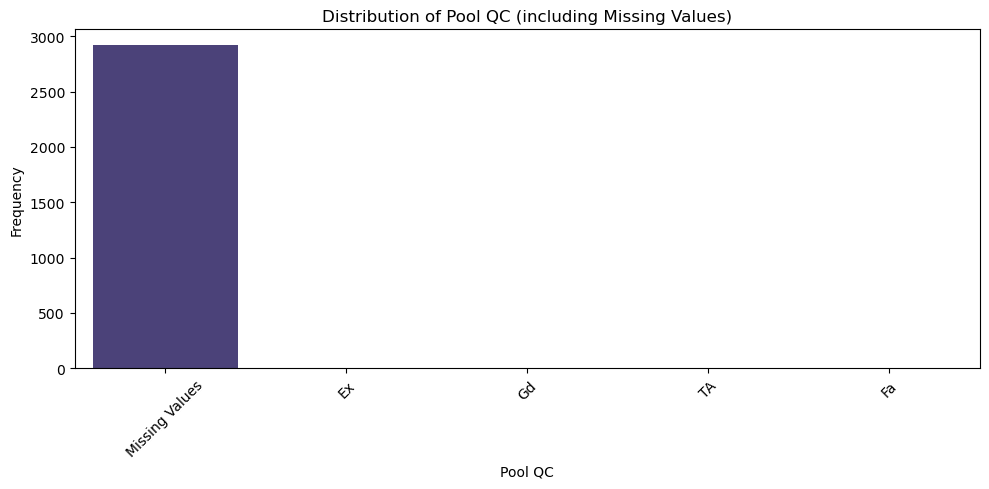

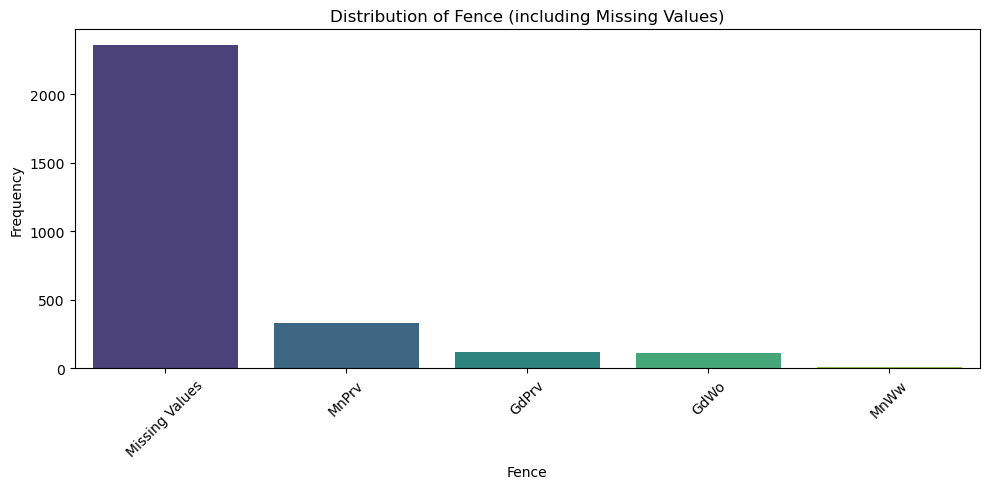

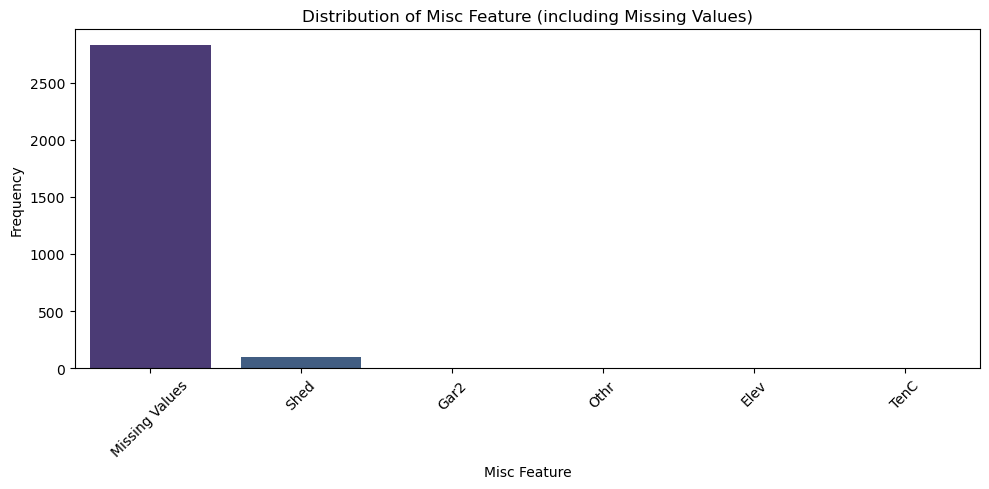

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check if there are categorical columns with missing values
if cat_cols_null:
    for col in cat_cols_null:
        plt.figure(figsize=(10, 5))
        
        # Count occurrences of each category, including NaN
        counts = df[col].value_counts(dropna=False).reset_index()  # Include NaN in counts
        counts.columns = [col, 'Frequency']  # Rename columns for clarity
        counts['Category'] = counts[col].where(counts[col].notnull(), 'Missing Values')  # Handle missing values

        # Create a bar plot with 'Category' as hue
        sns.barplot(x='Category', y='Frequency', data=counts, hue='Category', palette='viridis', legend=False)
        
        # Add labels and title
        plt.title(f'Distribution of {col} (including Missing Values)')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns with missing values found.")


In [15]:
# Select all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
#print(cat_cols)

# List of categorical features that contain null values
cat_cols_null = [col for col in cat_cols if df[col].isnull().any()]
print(cat_cols_null)

# Fill missing values for categorical columns (example: using the mode)
for col in cat_cols_null:
    df[col].fillna(df[col].mode()[0], inplace=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cat_cols:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col] = label_encoder.fit_transform(df[col])


[]


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
#print(cat_cols)

# List of categorical features that contain null values
cat_cols_null = [col for col in cat_cols if df[col].isnull().any()]
print(cat_cols_null)

# Fill missing values for categorical columns (using the mode)
for col in cat_cols_null:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col] = label_encoder.fit_transform(df[col])

# Now `df` contains the label encoded categorical features.


[]


In [17]:
# Check for any remaining null values in categorical columns
missing_values = df[cat_cols].isnull().sum()

# Display columns with missing values, if any
missing_values = missing_values[missing_values > 0]
print("Missing values in categorical columns:\n", missing_values)


Missing values in categorical columns:
 Series([], dtype: float64)
